In [1]:
import pandas as pd

# Load the BED file
df = pd.read_csv('intersection_GERP_HyPhy.bed', 
                 sep='\t', 
                 header=None, 
                 names=['chrom', 'start', 'end', 'name', 'score', 'strand'])

# Display the first few rows
print(df.head())

                 chrom  start   end name score strand
0  ACmerged_contig_797   1585  1593    .     .      .
1  ACmerged_contig_797   1597  1611    .     .      .
2  ACmerged_contig_797   1618  1623    .     .      .
3  ACmerged_contig_797   1633  1635    .     .      .
4  ACmerged_contig_797   1639  1641    .     .      .


In [4]:
# Add length column
df['length'] = df['end'] - df['start']

# Display the first few rows
df

,chrom,start,end,name,score,strand,length
0,ACmerged_contig_797,1585,1593,.,.,.,8
1,ACmerged_contig_797,1597,1611,.,.,.,14
2,ACmerged_contig_797,1618,1623,.,.,.,5
3,ACmerged_contig_797,1633,1635,.,.,.,2
4,ACmerged_contig_797,1639,1641,.,.,.,2
...,...,...,...,...,...,...,...
155,ACmerged_contig_24516,484,486,.,.,.,2
156,ACmerged_contig_25968,373,378,.,.,.,5
157,ACmerged_contig_31289,1063,1067,.,.,.,4
158,ACmerged_contig_33065,694,699,.,.,.,5


In [8]:
import pandas as pd

# Load the BED file
df = pd.read_csv('intersection_GERP_HyPhy.bed', 
                 sep='\t', 
                 header=None, 
                 names=['chrom', 'start', 'end', 'name', 'score', 'strand'])

# Add length column
df['length'] = df['end'] - df['start']

df.head()

,chrom,start,end,name,score,strand,length
0,ACmerged_contig_797,1585,1593,.,.,.,8
1,ACmerged_contig_797,1597,1611,.,.,.,14
2,ACmerged_contig_797,1618,1623,.,.,.,5
3,ACmerged_contig_797,1633,1635,.,.,.,2
4,ACmerged_contig_797,1639,1641,.,.,.,2


In [11]:
# Count occurrences per chromosome
chrom_counts = df['chrom'].value_counts()
chrom_counts.head()

chrom
ACmerged_contig_14982    20
ACmerged_contig_797       8
ACmerged_contig_24224     6
ACmerged_contig_2432      4
ACmerged_contig_17688     4
Name: count, dtype: int64

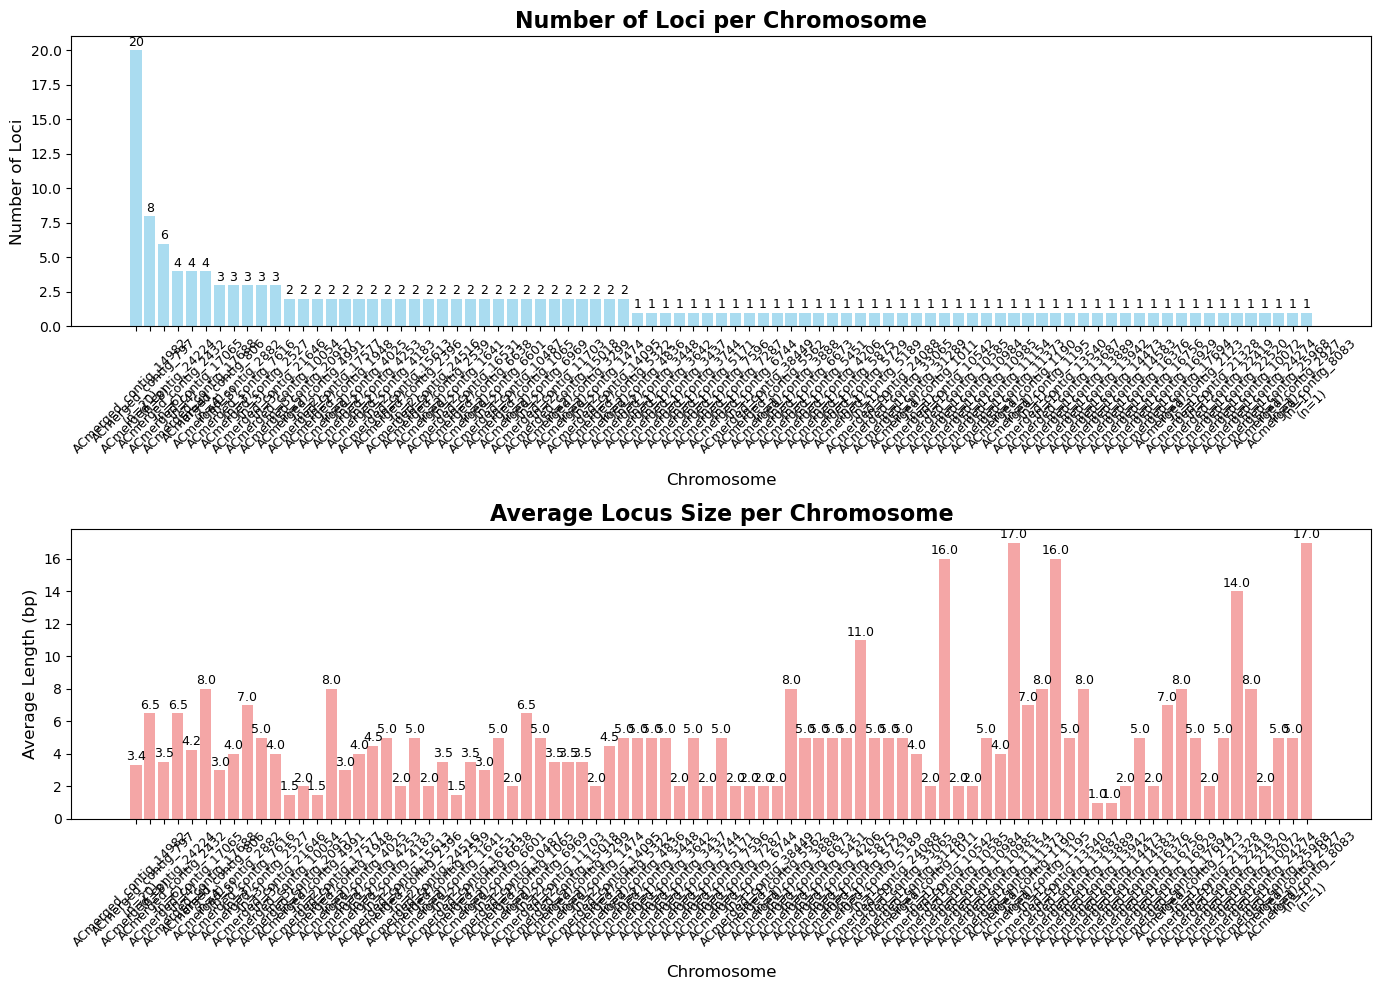

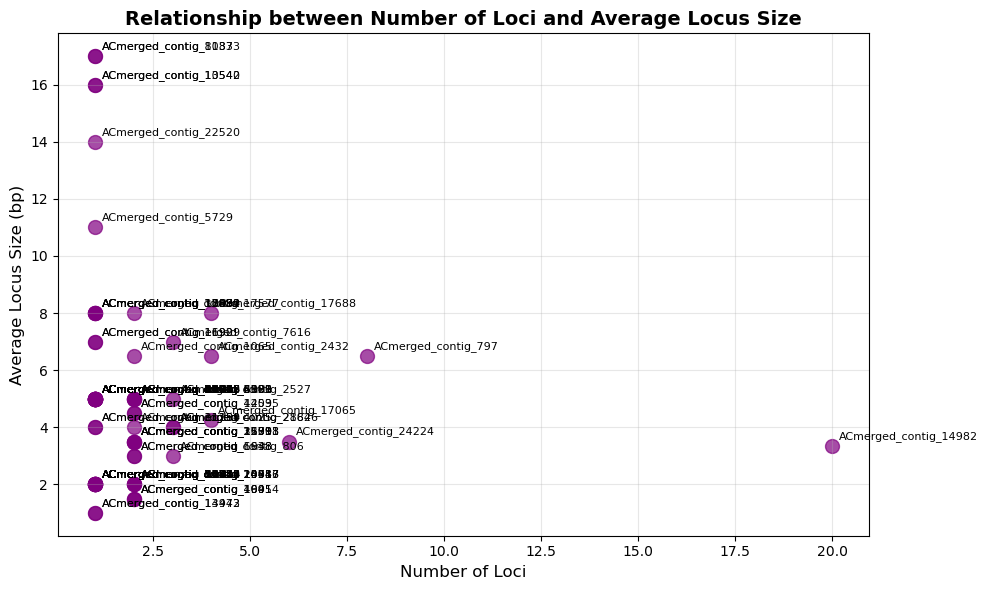

Summary Statistics:
Total chromosomes: 85
Total loci: 160
Average loci per chromosome: 1.88
Median loci per chromosome: 1.0
Average locus size: 4.96 bp
Median locus size: 5.00 bp


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
plt.style.use('default')
sns.set_palette("husl")

# Load the BED file and add length column
df = pd.read_csv('intersection_GERP_HyPhy.bed', 
                 sep='\t', 
                 header=None, 
                 names=['chrom', 'start', 'end', 'name', 'score', 'strand'])
df['length'] = df['end'] - df['start']

# Get chromosome counts and average sizes
chrom_stats = df.groupby('chrom').agg(
    count=('chrom', 'size'),
    total_length=('length', 'sum'),
    avg_length=('length', 'mean')
).reset_index()

# Sort by count for better visualization
chrom_stats = chrom_stats.sort_values('count', ascending=False)

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# Plot 1: Number of loci per chromosome (bar plot)
bars1 = ax1.bar(range(len(chrom_stats)), chrom_stats['count'], color='skyblue', alpha=0.7)
ax1.set_title('Number of Loci per Chromosome', fontsize=16, fontweight='bold')
ax1.set_ylabel('Number of Loci', fontsize=12)
ax1.set_xlabel('Chromosome', fontsize=12)
ax1.tick_params(axis='x', rotation=45)

# Add value labels on bars
for i, bar in enumerate(bars1):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{int(height)}', ha='center', va='bottom', fontsize=9)

# Plot 2: Average locus size per chromosome (bar plot)
bars2 = ax2.bar(range(len(chrom_stats)), chrom_stats['avg_length'], color='lightcoral', alpha=0.7)
ax2.set_title('Average Locus Size per Chromosome', fontsize=16, fontweight='bold')
ax2.set_ylabel('Average Length (bp)', fontsize=12)
ax2.set_xlabel('Chromosome', fontsize=12)
ax2.tick_params(axis='x', rotation=45)

# Add value labels on bars
for i, bar in enumerate(bars2):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{height:.1f}', ha='center', va='bottom', fontsize=9)

# Set x-axis labels for both plots
chrom_labels = [f"{chrom}\n(n={count})" for chrom, count in zip(chrom_stats['chrom'], chrom_stats['count'])]
for ax in [ax1, ax2]:
    ax.set_xticks(range(len(chrom_stats)))
    ax.set_xticklabels(chrom_labels, fontsize=9)

plt.tight_layout()
plt.show()

# Additional: Scatter plot showing relationship between count and average size
plt.figure(figsize=(10, 6))
plt.scatter(chrom_stats['count'], chrom_stats['avg_length'], s=100, alpha=0.7, color='purple')
plt.title('Relationship between Number of Loci and Average Locus Size', fontsize=14, fontweight='bold')
plt.xlabel('Number of Loci', fontsize=12)
plt.ylabel('Average Locus Size (bp)', fontsize=12)

# Add chromosome labels to points
for i, row in chrom_stats.iterrows():
    plt.annotate(row['chrom'], (row['count'], row['avg_length']), 
                 xytext=(5, 5), textcoords='offset points', fontsize=8)

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print summary statistics
print("Summary Statistics:")
print(f"Total chromosomes: {len(chrom_stats)}")
print(f"Total loci: {chrom_stats['count'].sum()}")
print(f"Average loci per chromosome: {chrom_stats['count'].mean():.2f}")
print(f"Median loci per chromosome: {chrom_stats['count'].median()}")
print(f"Average locus size: {chrom_stats['avg_length'].mean():.2f} bp")
print(f"Median locus size: {chrom_stats['avg_length'].median():.2f} bp")

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from scipy.spatial import distance

# Create plots directory if it doesn't exist
os.makedirs('plots', exist_ok=True)

# Set style
plt.style.use('default')
sns.set_palette("husl")

# Load the BED file and add length column
df = pd.read_csv('intersection_GERP_HyPhy.bed', 
                 sep='\t', 
                 header=None, 
                 names=['chrom', 'start', 'end', 'name', 'score', 'strand'])
df['length'] = df['end'] - df['start']

# Get chromosome counts and average sizes
chrom_stats = df.groupby('chrom').agg(
    count=('chrom', 'size'),
    total_length=('length', 'sum'),
    avg_length=('length', 'mean'),
    median_length=('length', 'median')
).reset_index()

# Sort by count for better visualization
chrom_stats = chrom_stats.sort_values('count', ascending=False)

# Create subplots for count and size
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12))

# Plot 1: Number of loci per chromosome (bar plot)
bars1 = ax1.bar(range(len(chrom_stats)), chrom_stats['count'], color='skyblue', alpha=0.7)
ax1.set_title('Number of Loci per Chromosome', fontsize=16, fontweight='bold')
ax1.set_ylabel('Number of Loci', fontsize=12)
ax1.set_xlabel('Chromosome', fontsize=12)
ax1.set_xticks(range(len(chrom_stats)))
ax1.set_xticklabels(chrom_stats['chrom'], rotation=90, fontsize=9)

# Add value labels on bars
for i, bar in enumerate(bars1):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{int(height)}', ha='center', va='bottom', fontsize=9)

# Plot 2: Average locus size per chromosome (bar plot)
bars2 = ax2.bar(range(len(chrom_stats)), chrom_stats['avg_length'], color='lightcoral', alpha=0.7)
ax2.set_title('Average Locus Size per Chromosome', fontsize=16, fontweight='bold')
ax2.set_ylabel('Average Length (bp)', fontsize=12)
ax2.set_xlabel('Chromosome', fontsize=12)
ax2.set_xticks(range(len(chrom_stats)))
ax2.set_xticklabels(chrom_stats['chrom'], rotation=90, fontsize=9)

# Add value labels on bars
for i, bar in enumerate(bars2):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{height:.1f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig('plots/chromosome_stats.png', dpi=300, bbox_inches='tight')
plt.close()

# Scatter plot showing relationship between count and average size
plt.figure(figsize=(12, 8))
scatter = plt.scatter(chrom_stats['count'], chrom_stats['avg_length'], s=100, alpha=0.7, color='purple')
plt.title('Relationship between Number of Loci and Average Locus Size', fontsize=14, fontweight='bold')
plt.xlabel('Number of Loci', fontsize=12)
plt.ylabel('Average Locus Size (bp)', fontsize=12)

# Add chromosome labels to points with adjusted positioning
for i, row in chrom_stats.iterrows():
    plt.annotate(row['chrom'], (row['count'], row['avg_length']), 
                 xytext=(8, 8), textcoords='offset points', fontsize=8,
                 ha='center', va='bottom', alpha=0.8)

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('plots/count_vs_size_scatter.png', dpi=300, bbox_inches='tight')
plt.close()

# Plot 3: Loci proximity analysis for chromosomes with multiple loci
multi_loci_chroms = chrom_stats[chrom_stats['count'] > 1]['chrom'].tolist()

if multi_loci_chroms:
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    axes = axes.flatten()
    
    proximity_data = []
    
    for i, chrom in enumerate(multi_loci_chroms[:4]):  # Limit to first 4 for clarity
        chrom_data = df[df['chrom'] == chrom].sort_values('start')
        
        # Calculate distances between consecutive loci
        starts = chrom_data['start'].values
        distances = np.diff(starts)
        
        # Plot the positions
        axes[i].scatter(range(len(starts)), starts, color='blue', s=50, alpha=0.7)
        axes[i].plot(range(len(starts)), starts, 'r-', alpha=0.5)
        axes[i].set_title(f'Loci Positions on {chrom}\n({len(starts)} loci)', fontsize=12, fontweight='bold')
        axes[i].set_xlabel('Locus Index', fontsize=10)
        axes[i].set_ylabel('Genomic Position', fontsize=10)
        axes[i].grid(True, alpha=0.3)
        
        # Calculate proximity metrics
        if len(distances) > 0:
            avg_distance = np.mean(distances)
            min_distance = np.min(distances)
            proximity_data.append({
                'chrom': chrom,
                'avg_distance': avg_distance,
                'min_distance': min_distance,
                'num_loci': len(starts)
            })
    
    plt.tight_layout()
    plt.savefig('plots/loci_proximity_positions.png', dpi=300, bbox_inches='tight')
    plt.close()
    
    # Create a summary plot of proximity metrics
    if proximity_data:
        prox_df = pd.DataFrame(proximity_data)
        plt.figure(figsize=(12, 8))
        
        x_pos = np.arange(len(prox_df))
        width = 0.35
        
        plt.bar(x_pos - width/2, prox_df['avg_distance'], width, label='Average Distance', alpha=0.7)
        plt.bar(x_pos + width/2, prox_df['min_distance'], width, label='Minimum Distance', alpha=0.7)
        
        plt.xlabel('Chromosome', fontsize=12)
        plt.ylabel('Distance (bp)', fontsize=12)
        plt.title('Loci Proximity Metrics for Chromosomes with Multiple Loci', fontsize=14, fontweight='bold')
        plt.xticks(x_pos, prox_df['chrom'], rotation=45, ha='right')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.savefig('plots/loci_proximity_metrics.png', dpi=300, bbox_inches='tight')
        plt.close()

# Print summary statistics
print("Summary Statistics:")
print(f"Total chromosomes: {len(chrom_stats)}")
print(f"Total loci: {chrom_stats['count'].sum()}")
print(f"Average loci per chromosome: {chrom_stats['count'].mean():.2f}")
print(f"Median loci per chromosome: {chrom_stats['count'].median()}")
print(f"Average locus size: {chrom_stats['avg_length'].mean():.2f} bp")
print(f"Median locus size: {chrom_stats['avg_length'].median():.2f} bp")
print(f"Chromosomes with multiple loci: {len(multi_loci_chroms)}")

# Save the statistics to a file
chrom_stats.to_csv('plots/chromosome_statistics.csv', index=False)
print("\nPlots saved in the 'plots' directory:")
print("- chromosome_stats.png")
print("- count_vs_size_scatter.png")
print("- loci_proximity_positions.png")
print("- loci_proximity_metrics.png")
print("- chromosome_statistics.csv")


Summary Statistics:
Total chromosomes: 85
Total loci: 160
Average loci per chromosome: 1.88
Median loci per chromosome: 1.0
Average locus size: 4.96 bp
Median locus size: 5.00 bp
Chromosomes with multiple loci: 36

Plots saved in the 'plots' directory:
- chromosome_stats.png
- count_vs_size_scatter.png
- loci_proximity_positions.png
- loci_proximity_metrics.png
- chromosome_statistics.csv
